In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [2]:
Data = pd.read_csv("SalaryData_Train.csv")
Data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
Data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


# Data Cleaning

In [5]:
Data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
Data.age = Data.age.astype(float)
Data['hoursperweek'] = Data['hoursperweek'].astype(float)

In [7]:
my_df = Data.dropna()

In [8]:
my_df['predclass'] = my_df['Salary']
del my_df['Salary']
my_df['education'] = my_df['educationno']
del my_df['educationno']

In [9]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 30160
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            30161 non-null  float64
 1   workclass      30161 non-null  object 
 2   education      30161 non-null  int64  
 3   maritalstatus  30161 non-null  object 
 4   occupation     30161 non-null  object 
 5   relationship   30161 non-null  object 
 6   race           30161 non-null  object 
 7   sex            30161 non-null  object 
 8   capitalgain    30161 non-null  int64  
 9   capitalloss    30161 non-null  int64  
 10  hoursperweek   30161 non-null  float64
 11  native         30161 non-null  object 
 12  predclass      30161 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 3.2+ MB


In [10]:
my_df.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
predclass        0
dtype: int64

# Feature Engineering

In [11]:
print('workclass',my_df.workclass.unique())
print('education',my_df.education.unique())
print('maritalstatus',my_df.maritalstatus.unique())
print('occupation',my_df.occupation.unique())
print('relationship',my_df.relationship.unique())
print('race',my_df.race.unique())
print('sex',my_df.sex.unique())
print('native',my_df['native'].unique())
print('predclass',my_df.predclass.unique())
print('capitalgain',my_df.predclass.unique())
print('capitalloss',my_df.predclass.unique())
print('hoursperweek',my_df.predclass.unique())
print('salary',my_df.predclass.unique())
     

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
maritalstatus [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' H

# Predclass

<AxesSubplot:xlabel='count', ylabel='predclass'>

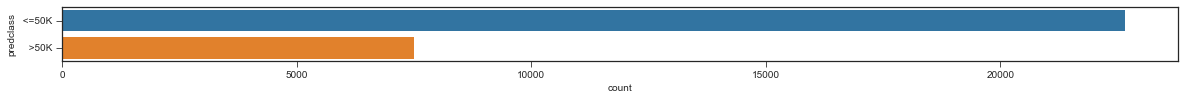

In [12]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df)

# Education

In [13]:
my_df['education'].replace('Preschool', 'dropout',inplace=True)
my_df['education'].replace('10th', 'dropout',inplace=True)
my_df['education'].replace('11th', 'dropout',inplace=True)
my_df['education'].replace('12th', 'dropout',inplace=True)
my_df['education'].replace('1st-4th', 'dropout',inplace=True)
my_df['education'].replace('5th-6th', 'dropout',inplace=True)
my_df['education'].replace('7th-8th', 'dropout',inplace=True)
my_df['education'].replace('9th', 'dropout',inplace=True)
my_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace('Masters', 'Masters',inplace=True)
my_df['education'].replace('Prof-school', 'Masters',inplace=True)
my_df['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [14]:
my_df[['education', 'educationno']].groupby(['education'], as_index=False).mean().sort_values(by='educationno', ascending=False)

KeyError: "['educationno'] not in index"

<AxesSubplot:xlabel='count', ylabel='education'>

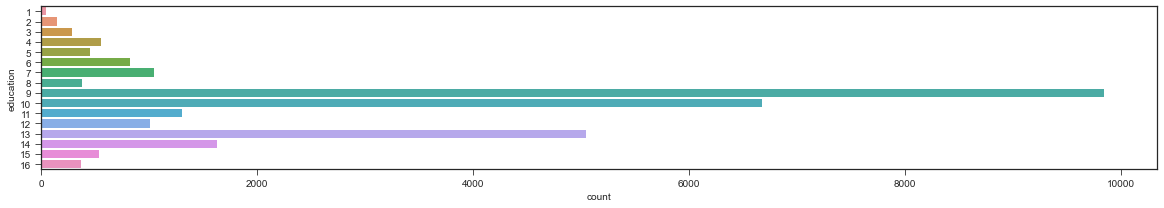

In [15]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=my_df)

# martialstatus

In [16]:
#df2 = my_df['marital-status'].replace(' Never-married', 'NotMarried')
my_df['maritalstatus'].replace('Never-married', 'NotMarried',inplace=True)
my_df['maritalstatus'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df['maritalstatus'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['maritalstatus'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['maritalstatus'].replace(['Separated'], 'Separated',inplace=True)
my_df['maritalstatus'].replace(['Divorced'], 'Separated',inplace=True)
my_df['maritalstatus'].replace(['Widowed'], 'Widowed',inplace=True)

<AxesSubplot:xlabel='count', ylabel='maritalstatus'>

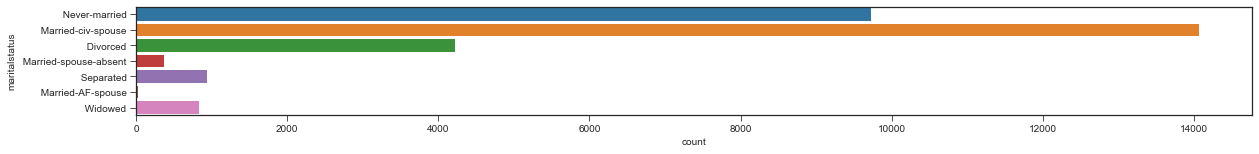

In [17]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="maritalstatus", data=my_df)

# Occupation

<AxesSubplot:xlabel='count', ylabel='occupation'>

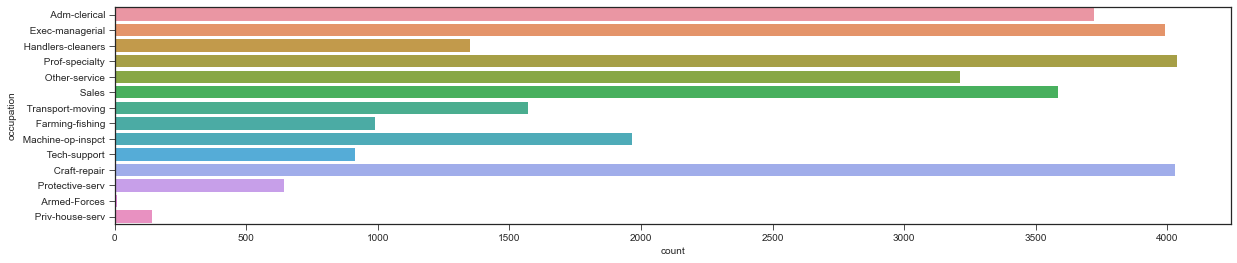

In [18]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=my_df)

# Workclass

<AxesSubplot:xlabel='count', ylabel='workclass'>

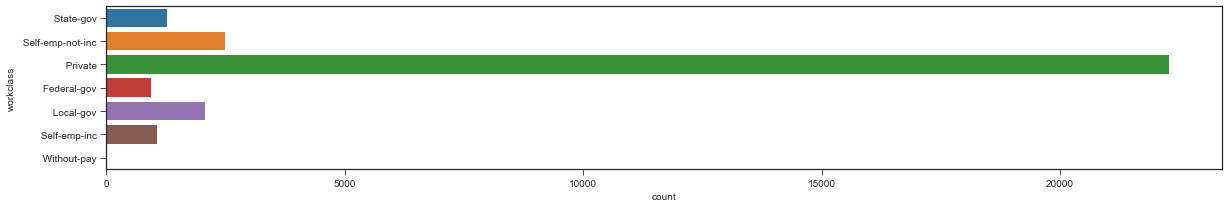

In [19]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=my_df)

# Age

In [20]:
# make the age variable discretized 
my_df['age_bin'] = pd.cut(my_df['age'], 20)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:xlabel='age'>

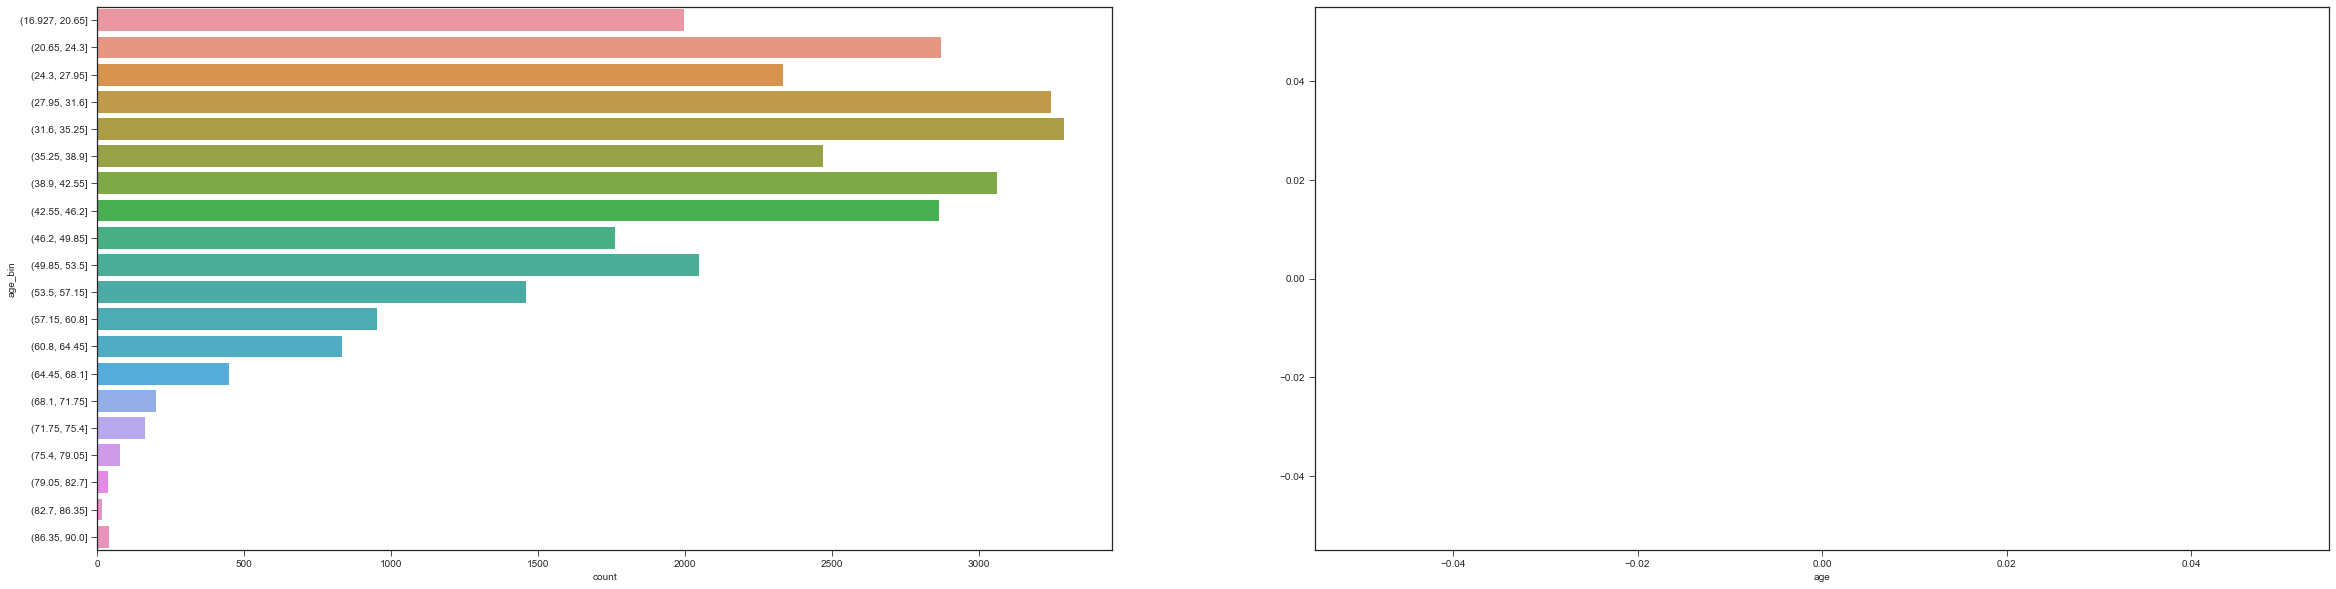

In [21]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(40,10)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=my_df)
plt.subplot(1, 2, 2)
sns.distplot(my_df[my_df['predclass'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

In [22]:
my_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,predclass,age
1,>50K,43.959110
0,<=50K,36.608264


# Race

<AxesSubplot:xlabel='race', ylabel='prop'>

<Figure size 1440x360 with 0 Axes>

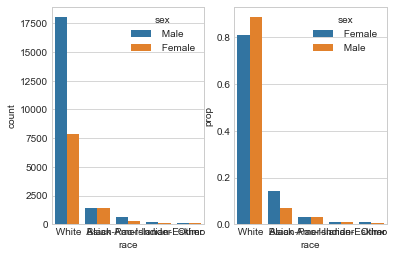

In [23]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])

prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])


# Hoursperweek

In [24]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
my_df['hoursperweek_bin'] = pd.cut(my_df['hoursperweek'], 10)
my_df['hoursperweek'] = my_df['hoursperweek']

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / 

(20.0, 60.0)

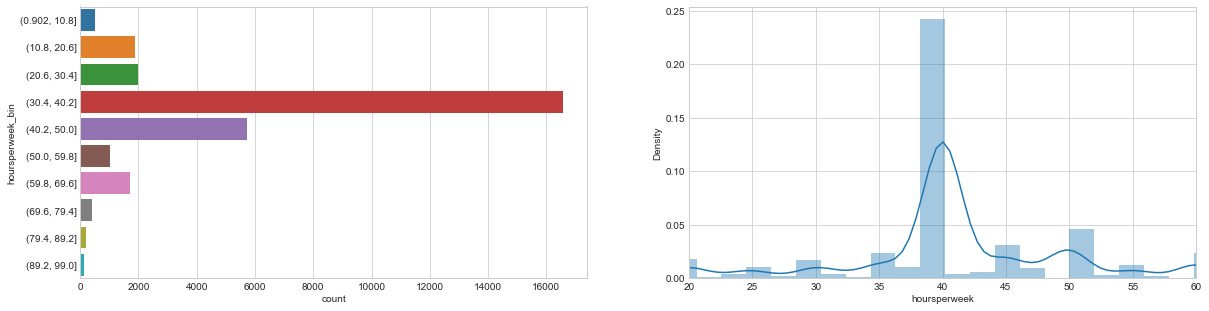

In [25]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hoursperweek_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df['hoursperweek']);
sns.distplot(my_df[my_df['predclass'] == '>50K']['hoursperweek'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['hoursperweek'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

# Sex

<AxesSubplot:xlabel='count', ylabel='sex'>

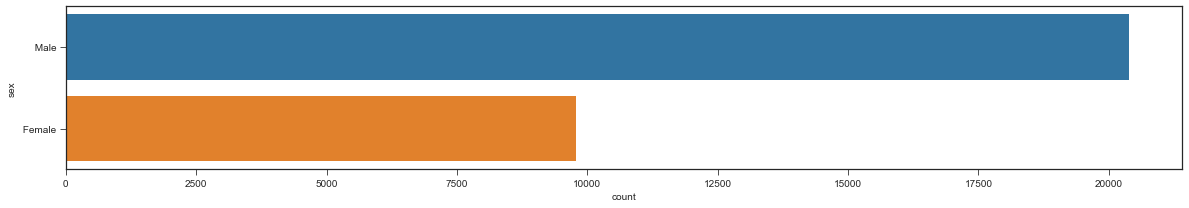

In [26]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="sex", data=my_df)

# Applying naive bayes for classification

In [27]:
Data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [28]:
def split_into_words(i):
    return (i.split(" "))

In [29]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(my_df,test_size=0.3)

In [30]:
email_test

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,predclass,age_bin,hoursperweek_bin
17197,41.0,Private,9,Married-civ-spouse,Transport-moving,Wife,White,Female,0,0,40.0,United-States,<=50K,"(38.9, 42.55]","(30.4, 40.2]"
12816,24.0,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,44.0,Mexico,<=50K,"(20.65, 24.3]","(40.2, 50.0]"
13316,25.0,Private,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40.0,United-States,<=50K,"(24.3, 27.95]","(30.4, 40.2]"
13502,22.0,Private,10,Never-married,Other-service,Own-child,White,Male,0,0,16.0,United-States,<=50K,"(20.65, 24.3]","(10.8, 20.6]"
13193,20.0,Private,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,35.0,United-States,<=50K,"(16.927, 20.65]","(30.4, 40.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28160,47.0,Private,9,Divorced,Sales,Unmarried,White,Female,0,0,45.0,United-States,<=50K,"(46.2, 49.85]","(40.2, 50.0]"
20828,17.0,Private,7,Never-married,Sales,Own-child,White,Female,0,0,13.0,United-States,<=50K,"(16.927, 20.65]","(10.8, 20.6]"
19902,59.0,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40.0,United-States,>50K,"(57.15, 60.8]","(30.4, 40.2]"
6639,25.0,Private,4,Never-married,Sales,Other-relative,White,Male,0,0,45.0,Guatemala,<=50K,"(24.3, 27.95]","(40.2, 50.0]"


In [31]:
# Preparing email texts into word count matrix format 
from sklearn.feature_extraction.text import CountVectorizer
emails_bow = CountVectorizer(analyzer=split_into_words).fit(my_df.workclass)

In [32]:
# For all messages
all_emails_matrix = emails_bow.transform(my_df.workclass)
all_emails_matrix.shape

(30161, 8)

In [33]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train.workclass)
train_emails_matrix.shape # (3891,8175)

# For testing messages
test_emails_matrix = emails_bow.transform(email_test.workclass)
test_emails_matrix.shape # (1668,8175)

(9049, 8)

In [34]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.native)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.native) 

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.native) 


In [35]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.native.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_emails_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.native) 

test_pred_g = classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.native) 

# Using TFIDF

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

train_tfidf.shape # (3891, 6661)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

test_tfidf.shape #  (1668, 6661)



(9049, 8)

In [37]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.native)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.native) 

test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.native) 


In [38]:
accuracy_train_m

0.9144088669950738

In [39]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.native.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.native) # 95%
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.native) # 88%

# inplace of tfidf we can also use train_emails_matrix and test_emails_matrix instead of term inverse document frequency matrix

In [40]:
accuracy_test_g

0.002983755111061996

# Train-test split

In [41]:
drop_elements = ['education', 'native', 'predclass', 'age_bin', 'hoursperweek_bin']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)
X.head()

,age,workclass,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,39.0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0
1,50.0,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0
2,38.0,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0
3,53.0,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0
4,28.0,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0


# N-gram

In [42]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [43]:
top2_words = get_top_n2_words(my_df["workclass"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,self emp,3573
1,emp not,2499
2,not inc,2499
3,local gov,2067
4,state gov,1279


[Text(0, 0, 'self emp'),
 Text(1, 0, 'emp not'),
 Text(2, 0, 'not inc'),
 Text(3, 0, 'local gov'),
 Text(4, 0, 'state gov'),
 Text(5, 0, 'emp inc'),
 Text(6, 0, 'federal gov'),
 Text(7, 0, 'without pay')]

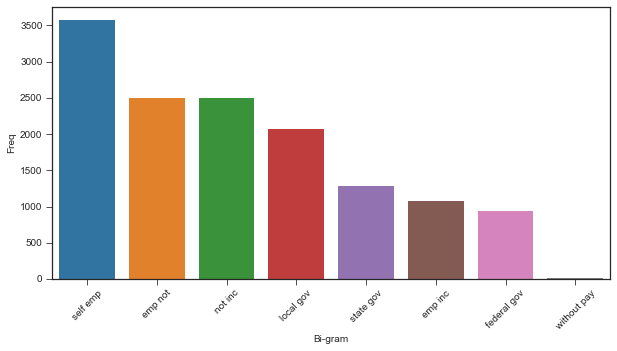

In [44]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [45]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [46]:
top3_words = get_top_n3_words(my_df["workclass"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [47]:
top3_df

,Tri-gram,Freq
0,self emp not,2499
1,emp not inc,2499
2,self emp inc,1074


[Text(0, 0, 'self emp not'),
 Text(1, 0, 'emp not inc'),
 Text(2, 0, 'self emp inc')]

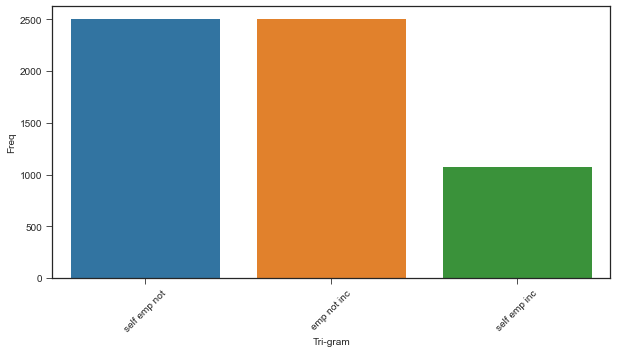

In [48]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])